In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

In [5]:
data = pd.read_csv('https://github.com/AJV009/simple-ml-nb/raw/main/housing-data.csv')

In [6]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

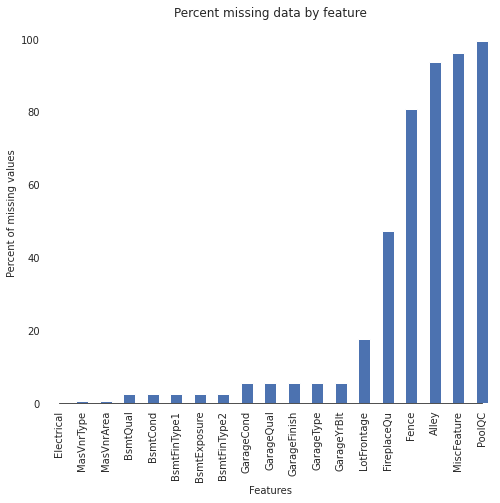

In [7]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(data.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

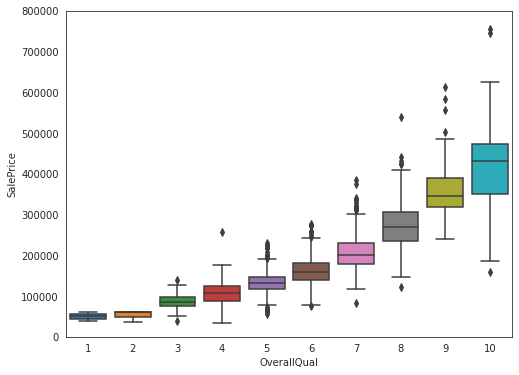

In [8]:
n_data = pd.concat([data['SalePrice'], data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data['OverallQual'], y="SalePrice", data=n_data)
fig.axis(ymin=0, ymax=800000);

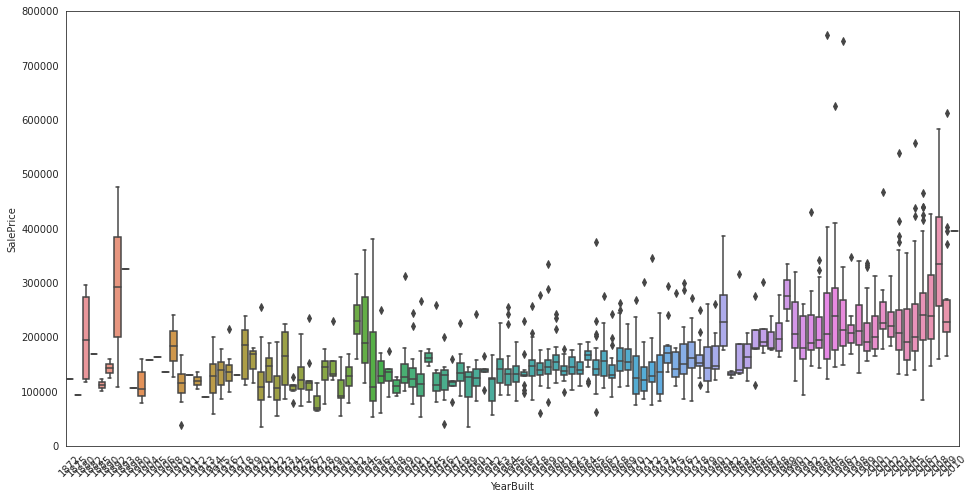

In [9]:
n_data = pd.concat([data['SalePrice'], data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=data['YearBuilt'], y="SalePrice", data=n_data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

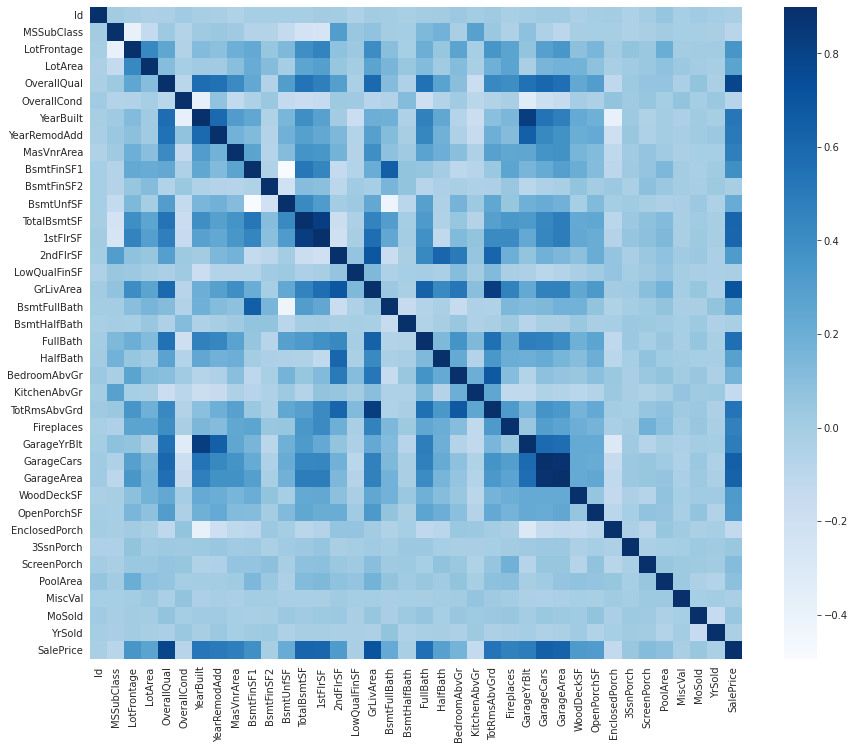

In [10]:
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [11]:
drop_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
data.drop(drop_col,axis=1,inplace=True)

In [13]:
numeric = data.dtypes[data.dtypes != 'object'].index
categorical = data.dtypes[data.dtypes == 'object'].index

In [14]:
numeric, categorical

(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heat

In [15]:
def clean_dataset(data):    
    data['MoSold'] = data['MoSold'].apply(str)

    data['FireplaceQu'].value_counts()
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

    data['LotFrontage'].value_counts()
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    data['GarageFinish'].value_counts()
    data['GarageFinish'] = data['GarageFinish'].fillna('None')

    data['GarageYrBlt'].value_counts()
    data['GarageYrBlt'] = data['GarageYrBlt'].apply(str)
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna('None')

    data['GarageQual'].value_counts()
    data['GarageQual'] = data['GarageQual'].fillna('None')

    data['GarageCond'].value_counts()
    data['GarageCond'] = data['GarageCond'].fillna('None')

    data['GarageType'].value_counts()
    data['GarageType'] = data['GarageType'].fillna('None')

    data['BsmtExposure'].value_counts()
    data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

    data['BsmtCond'].value_counts()
    data['BsmtCond'] = data['BsmtCond'].fillna('None')

    data['BsmtQual'].value_counts()
    data['BsmtQual'] = data['BsmtQual'].fillna('None')

    data['BsmtFinType2'].value_counts()
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

    data['BsmtFinType1'].value_counts()
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

    data['MasVnrType'].value_counts()
    data['MasVnrType'] = data['MasVnrType'].fillna('None')

    data['MasVnrArea'].value_counts()
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

    data['MSZoning'].value_counts()
    data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

    data['BsmtFullBath'].value_counts()
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)

    data['BsmtHalfBath'].value_counts()
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)

    data['Utilities'].value_counts()
    data = data.drop('Utilities', axis = 1)

    data['Functional'].value_counts()
    data['Functional'] = data['Functional'].fillna('Typ')

    data['Exterior2nd'].value_counts()
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

    data['Exterior1st'].value_counts()
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])

    data['SaleType'].value_counts()
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

    data['BsmtFinSF1'].value_counts()
    data['BsmtFinSF1'] = data['BsmtFinSF1'].transform(lambda x: x.fillna(x.median()))

    data['BsmtFinSF2'].value_counts()
    data['BsmtFinSF2'] = data['BsmtFinSF2'].transform(lambda x: x.fillna(x.median()))

    data['BsmtUnfSF'].value_counts()
    data['BsmtUnfSF'] = data['BsmtUnfSF'].transform(lambda x: x.fillna(x.median()))

    data['Electrical'].value_counts()
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

    data['KitchenQual'].value_counts()
    data['KitchenQual'] = data['KitchenQual'].fillna('TA')

    data['GarageCars'].value_counts()
    data['GarageCars'] = data['GarageCars'].fillna(2)

    data['GarageArea'].value_counts()
    data['GarageArea'] = data['GarageArea'].transform(lambda x: x.fillna(x.median()))

    data['TotalBsmtSF'].value_counts()
    data['TotalBsmtSF'] = data['TotalBsmtSF'].transform(lambda x: x.fillna(x.median()))
    
    return data

In [16]:
target = data.pop('SalePrice').values

In [17]:
data = clean_dataset(data)

In [18]:
data.shape,target.shape

((1460, 75), (1460,))

In [19]:
data = pd.get_dummies(data)

In [20]:
data.shape,target.shape

((1460, 392), (1460,))

In [21]:
sc.fit(data)
sc.transform(data)


array([[-1.73086488,  0.07337496, -0.23187687, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276,  0.43704276, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496, -0.09809294, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939, -0.18728222, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276, -0.09809294, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276,  0.21406955, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [22]:
train, test = train_test_split(data, test_size=0.33, shuffle=False)

In [24]:
model = tf.keras.Sequential()
model.add(layers.Dense(256, input_dim = train.shape[1], activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(layers.Dense(32, activation = 'relu', kernel_initializer = 'random_normal'))

model.add(layers.Dense(1, activation = 'linear'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               100608    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 160,385
Trainable params: 160,385
Non-tr

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_logarithmic_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', verbose=1, factor=0.9, patience=15)
save_best = tf.keras.callbacks.ModelCheckpoint('./House_Prediction_Model.h5',monitor="val_loss",verbose=1,save_best_only=True)

In [27]:
history = model.fit(train, target, epochs = 100, batch_size = 16, verbose = 1, validation_split = 0.2, callbacks=[save_best,reduce_lr])

Epoch 1/100
36/49 [=====================>........] - ETA: 0s - loss: 5.7150 
Epoch 00001: val_loss improved from inf to 0.11788, saving model to ./House_Prediction_Model.h5
49/49 [==============================] - 1s 9ms/step - loss: 4.2528 - val_loss: 0.1179 - lr: 0.0100
Epoch 2/100
36/49 [=====================>........] - ETA: 0s - loss: 0.1485
Epoch 00002: val_loss improved from 0.11788 to 0.08955, saving model to ./House_Prediction_Model.h5
49/49 [==============================] - 0s 5ms/step - loss: 0.1335 - val_loss: 0.0896 - lr: 0.0100
Epoch 3/100
44/49 [=========================>....] - ETA: 0s - loss: 0.0940
Epoch 00003: val_loss improved from 0.08955 to 0.05646, saving model to ./House_Prediction_Model.h5
49/49 [==============================] - 0s 5ms/step - loss: 0.0887 - val_loss: 0.0565 - lr: 0.0100
Epoch 4/100
35/49 [====================>.........] - ETA: 0s - loss: 0.0480
Epoch 00004: val_loss improved from 0.05646 to 0.04550, saving model to ./House_Prediction_Model.h5

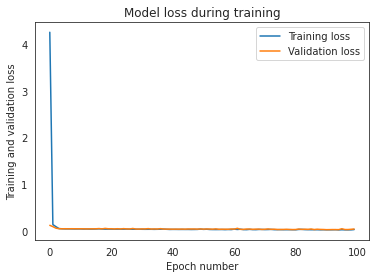

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss during training')
plt.xlabel('Epoch number')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss'])

In [29]:
model = keras.models.load_model('./House_Prediction_Model.h5')

In [30]:
y_predict = model.predict(test)
predicted = [item for sublist in y_predict for item in sublist]

In [35]:
train.shape, target.shape, len(predicted)

((978, 392), (1460,), 482)

In [42]:
true_pred = target[978:]

In [51]:
true_pred[:20], predicted[:20]

(array([110000, 139000, 178400, 336000, 159895, 255900, 126000, 125000,
        117000, 395192, 195000, 197000, 348000, 168000, 187000, 173900,
        337500, 121600, 136500, 185000]),
 [117261.0,
  135660.98,
  157489.97,
  321295.12,
  177343.2,
  248663.25,
  137135.08,
  127917.805,
  127334.12,
  349791.2,
  189121.52,
  197016.31,
  311526.8,
  173797.55,
  178472.86,
  172669.86,
  303169.38,
  118766.27,
  125938.19,
  168731.7])

In [49]:
predicted_a = [round(num) for num in predicted]

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(true_pred, predicted_a)  

1641849117.259336